## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [941]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [943]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.90000,19.10000,196.00000,3550.00000,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.20000,17.80000,198.00000,3950.00000,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.50000,13.50000,210.00000,4550.00000,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.20000,16.60000,191.00000,3250.00000,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.40000,14.40000,203.00000,4625.00000,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.10000,15.10000,209.00000,5500.00000,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.10000,16.50000,225.00000,5250.00000,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.70000,13.70000,208.00000,3950.00000,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.60000,20.70000,191.00000,3900.00000,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.10000,13.20000,211.00000,4500.00000,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [946]:
data.isna().sum()

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [948]:
data_cl = data.dropna()
data_cl.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [950]:
cat_features_mask = (data_cl.dtypes == "object").values
data_cl = pd.get_dummies(data_cl, columns=['Sex', 'Island', 'Clutch Completion'], dtype=float)
print(data_cl['Sex_.'].describe())
print(data_cl['Clutch Completion_No'].describe())
data_cl = data_cl.drop('Sex_.', axis=1)
data_cl

count   325.00000
mean      0.00308
std       0.05547
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Sex_., dtype: float64
count   325.00000
mean      0.10462
std       0.30653
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Clutch Completion_No, dtype: float64


,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
0,Chinstrap,382,50.90000,19.10000,196.00000,3550.00000,10.02372,-24.86594,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000
1,Chinstrap,741,45.20000,17.80000,198.00000,3950.00000,8.88942,-24.49433,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
2,Gentoo,744,46.50000,13.50000,210.00000,4550.00000,7.99530,-25.32829,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
3,Chinstrap,10,45.20000,16.60000,191.00000,3250.00000,9.62357,-24.78984,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
4,Gentoo,13,48.40000,14.40000,203.00000,4625.00000,8.16582,-26.13971,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,382,47.60000,18.30000,195.00000,3850.00000,8.83502,-24.65859,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
340,Adelie,382,39.70000,18.40000,190.00000,3900.00000,9.29808,-25.23453,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000
341,Adelie,16,38.60000,17.20000,199.00000,3750.00000,8.77322,-26.48973,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
342,Gentoo,392,46.60000,14.20000,210.00000,4850.00000,8.38289,-26.86352,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000


### Обоснование:
В данном случае оптимальнее всего использовать one-hote encoding для кодирования категориальных переменных, так как признаков сравнительно мало (то есть нет нужды использовать Frequency Encoding), и они не имеют порядковости (в ином случае потребовался бы Ordinal Encoding).

In [953]:
from sklearn.preprocessing import OrdinalEncoder
coding = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
data_cl['Species'] = coding.fit_transform(data_cl[['Species']])
data_cl

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
0,0.00000,382,50.90000,19.10000,196.00000,3550.00000,10.02372,-24.86594,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000
1,0.00000,741,45.20000,17.80000,198.00000,3950.00000,8.88942,-24.49433,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
2,1.00000,744,46.50000,13.50000,210.00000,4550.00000,7.99530,-25.32829,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,10,45.20000,16.60000,191.00000,3250.00000,9.62357,-24.78984,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
4,1.00000,13,48.40000,14.40000,203.00000,4625.00000,8.16582,-26.13971,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.00000,382,47.60000,18.30000,195.00000,3850.00000,8.83502,-24.65859,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
340,2.00000,382,39.70000,18.40000,190.00000,3900.00000,9.29808,-25.23453,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000
341,2.00000,16,38.60000,17.20000,199.00000,3750.00000,8.77322,-26.48973,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
342,1.00000,392,46.60000,14.20000,210.00000,4850.00000,8.38289,-26.86352,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [874]:
y = pd.DataFrame(
    data=data_cl['Species'])
data_rf = data_cl.drop('Species', axis=1)
x = pd.DataFrame(data=data_rf)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [877]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, stratify=y)
train_x


,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
273,10,43.50000,18.10000,202.00000,3400.00000,9.37608,-24.40753,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
283,8,49.80000,17.30000,198.00000,3675.00000,9.32169,-24.41562,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
334,11,50.50000,15.20000,216.00000,5000.00000,8.24691,-26.18466,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
18,4,51.50000,16.30000,230.00000,5500.00000,8.78557,-25.76147,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
62,0,46.80000,16.10000,215.00000,5500.00000,8.32359,-26.05756,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,733,48.20000,14.30000,210.00000,4600.00000,7.68870,-25.50811,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
341,16,38.60000,17.20000,199.00000,3750.00000,8.77322,-26.48973,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
78,379,36.20000,17.30000,187.00000,3300.00000,8.90723,-26.30037,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
22,387,50.50000,15.90000,225.00000,5400.00000,8.65803,-26.57585,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000


### Обоснование:
Stratify нужен для сохранения пропорций классов при разделении выборов, так как данных сравнительно немного - 325, случайно возникающий "перекос" в классах может привести к некорректному результату работы модели. Метод stratify позволяет сохранить пропорции разделения, что позволяет выдавать корректные прогнозы для всех классов категориального таргета - видов пигвинов.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [880]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_x_train = normalizer.fit_transform(train_x[['Flipper Length (mm)', 'Body Mass (g)']])
test_x_test = normalizer.transform(test_x[['Flipper Length (mm)', 'Body Mass (g)']])
test_x_test

array([[-8.03952960e-01, -7.71319289e-01],
       [ 2.11133972e+00,  2.30483147e+00],
       [-5.12423692e-01, -8.34097876e-01],
       [-1.24124686e+00, -1.11660152e+00],
       [-2.20894424e-01, -3.31869182e-01],
       [ 1.52828119e+00,  1.92815994e+00],
       [ 1.23675192e+00,  9.23702555e-01],
       [-8.03952960e-01, -9.59655050e-01],
       [-2.93776741e-01, -6.14372822e-01],
       [-1.02259991e+00, -1.65021951e+00],
       [ 5.80811064e-01,  2.33138100e-01],
       [ 6.53693381e-01,  7.35366795e-01],
       [-7.51297894e-02, -5.20204942e-01],
       [ 1.01810497e+00,  7.98145382e-01],
       [ 1.30963424e+00,  6.09809621e-01],
       [-2.20894424e-01, -8.96876463e-01],
       [ 5.80811064e-01,  4.84252447e-01],
       [ 6.53693381e-01, -1.43533421e-01],
       [-2.11583467e+00, -1.33632657e+00],
       [ 7.26575698e-01,  7.35366795e-01],
       [-8.03952960e-01,  4.84252447e-01],
       [-4.39541375e-01,  1.07580926e-01],
       [ 9.45222650e-01,  5.47031034e-01],
       [ 1.

In [882]:
from sklearn.neighbors import KNeighborsClassifier
nn = [1, 3, 5, 10, 15, 25]
train_y = np.array(train_y).ravel()
test_y = np.array(test_y).ravel()
print('NN	Train	Test')
clfs = []
for k in nn:
    clf = KNeighborsClassifier(n_neighbors=k)
    clfs.append(clf.fit(train_x_train, train_y))
    y_predicted_test = clf.predict(test_x_test)
    y_predicted_train = clf.predict(train_x_train)
    print(f'{k}	{(np.mean(np.array(train_y) == y_predicted_train)):.2f}	{(np.mean(np.array(test_y) == y_predicted_test)):.2f}')

NN	Train	Test
1	0.98	0.78
3	0.88	0.73
5	0.87	0.77
10	0.85	0.78
15	0.84	0.78
25	0.80	0.82


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [885]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [888]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [136]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

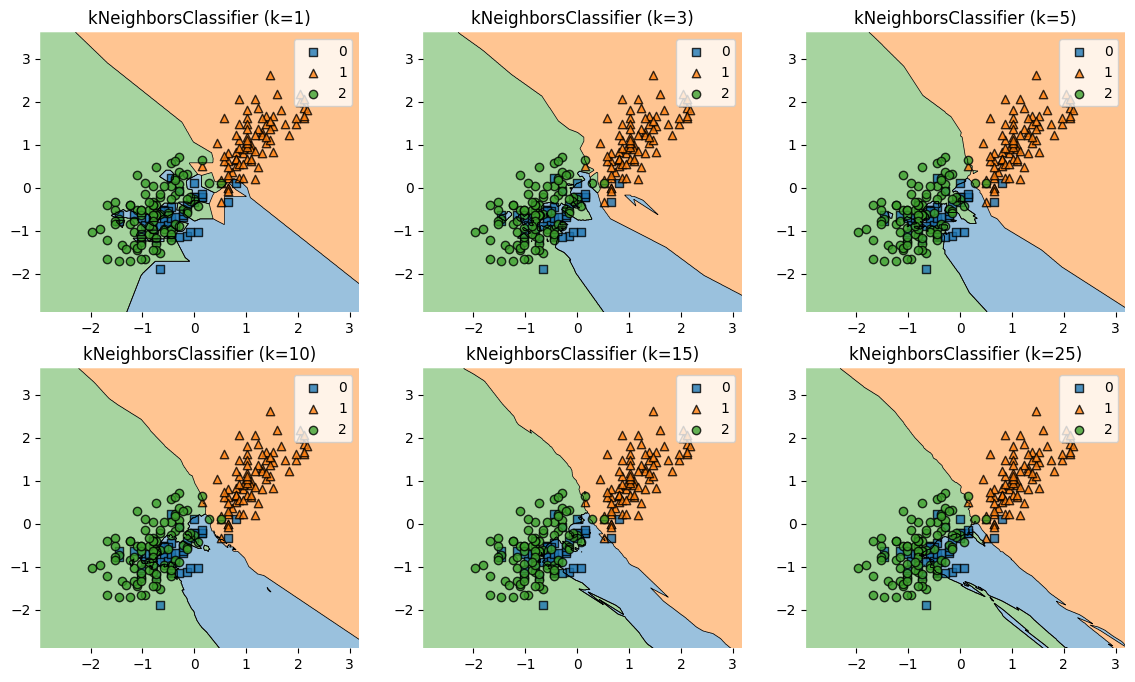

In [138]:
gs = gridspec.GridSpec(2, 3)
X = train_x_train
y = train_y.astype(np.int_)
fig = plt.figure(figsize=(14, 8))
labels = ['kNeighborsClassifier (k=1)', 'kNeighborsClassifier (k=3)', 'kNeighborsClassifier (k=5)', 'kNeighborsClassifier (k=10)', 'kNeighborsClassifier (k=15)', 'kNeighborsClassifier (k=25)']
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product(range(2), range(3))):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.legend(loc='upper right')
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Начну с конца. Явные принаки переобусения показывают модели с k равными 1 и 3. Это видно по решающей поверхности - в этих двух моделях каждой точки соответствует собственная цветовая зона, что не поволяет увидеть гомогенные решающие поверхности, которые говорят о нахождении гиперпараметра, работающего на других данных. Кроме того эти две модели показывают довольно высокие результаты на тренировочной выборке (особенно k = 1 с 98 accuracy на тренировочной), но куда более скромные результаты на тестовой. Такие модели будут хуже работать на новых данных. Также не стоит использовать модель с k равным 25, которая показывает странные артефакты на графике и видно игнорирование многих отличающихся данных, которые могли бы быть включены в корректную решающую поверхность (множество синих точек на зеленом фоне, хотя многие из них могли бы быть включены в синюю зону). Следовательно, стоит  использовать модели с k равным 5, 10 и 15, которые показывают как адекватные показатели accuracy на тесте и трейне, так и их геометрия данных выглядит адекватно.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

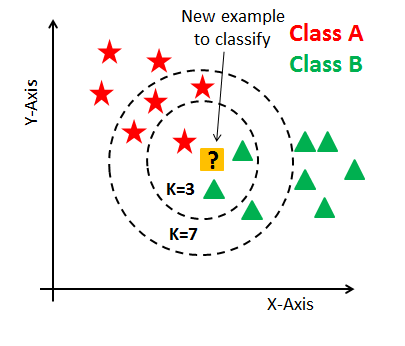

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [913]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        res = []
        predictions = []
        for i in X:
            distance = self.count_distance(x=self.X, y=i)
            num = np.argsort(distance)[:self.k]
            res = self.y[num]
            mod = int(Counter(res.ravel().tolist()).most_common(1)[0][0])
            predictions.append(mod)
        return predictions
    def count_distance(self, x, y):
        distances = np.linalg.norm(x - y, axis=1)
        return distances

In [915]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert np.all(knn.predict(X_test) == np.array([1, 0]))

### Примечание
Последний тест упорно не хотел у меня работать, несмотря на правильный ответ и корректную работу с новыми данными (видимо, проблема связана с форматом выдачи, хотя все сходится...). Я заменил его на такой же по смыслу тест, надеюсь, не напортачил :(

In [917]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [935]:
from sklearn.metrics import accuracy_score
results = []
nn = [1, 3, 5, 10, 15, 25]
for i in nn:
    knn = KNN(k=i)
    knn.fit(train_x_train, train_y)
    y_predicted_test = knn.predict(test_x_test)
    results.append(accuracy_score(test_y, y_predicted_test))
best_accuracy = max(results)
best_k = results.index(best_accuracy)
print(f'Лучшее k: {nn[best_k]} с точностью {best_accuracy:.4f} на test')

Лучшее k: 25 с точностью 0.8163 на test


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [968]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23000,Ideal,E,SI2,61.50000,55.00000,326,3.95000,3.98000,2.43000
1,2,0.21000,Premium,E,SI1,59.80000,61.00000,326,3.89000,3.84000,2.31000
2,3,0.23000,Good,E,VS1,56.90000,65.00000,327,4.05000,4.07000,2.31000
3,4,0.29000,Premium,I,VS2,62.40000,58.00000,334,4.20000,4.23000,2.63000
4,5,0.31000,Good,J,SI2,63.30000,58.00000,335,4.34000,4.35000,2.75000


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [972]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [974]:
data_cl = data.drop('Unnamed: 0', axis=1)
data_cl.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23000,Ideal,E,SI2,61.50000,55.00000,326,3.95000,3.98000,2.43000
1,0.21000,Premium,E,SI1,59.80000,61.00000,326,3.89000,3.84000,2.31000
2,0.23000,Good,E,VS1,56.90000,65.00000,327,4.05000,4.07000,2.31000
3,0.29000,Premium,I,VS2,62.40000,58.00000,334,4.20000,4.23000,2.63000
4,0.31000,Good,J,SI2,63.30000,58.00000,335,4.34000,4.35000,2.75000


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [977]:
data_pr = data_cl[['price','carat', 'depth', 'table', 'x', 'y', 'z']]
correl = data_pr.corr()
correl

,price,carat,depth,table,x,y,z
price,1.00000,0.92159,-0.01065,0.12713,0.88444,0.86542,0.86125
carat,0.92159,1.00000,0.02822,0.18162,0.97509,0.95172,0.95339
depth,-0.01065,0.02822,1.00000,-0.29578,-0.02529,-0.02934,0.09492
table,0.12713,0.18162,-0.29578,1.00000,0.19534,0.18376,0.15093
x,0.88444,0.97509,-0.02529,0.19534,1.00000,0.97470,0.97077
y,0.86542,0.95172,-0.02934,0.18376,0.97470,1.00000,0.95201
z,0.86125,0.95339,0.09492,0.15093,0.97077,0.95201,1.00000


### Обоснование
Наибольшую корреляцию с целевой переменной имеют carat, x, y и z (0.86-0.93). Судя по всему,больше всего на цену брильянта влияют вес и размеры драгоценного камня (что звучит довольно логично)

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [981]:
data_cl = pd.get_dummies(data_cl, dtype=float)
data_cl

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23000,61.50000,55.00000,326,3.95000,3.98000,2.43000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,0.21000,59.80000,61.00000,326,3.89000,3.84000,2.31000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.23000,56.90000,65.00000,327,4.05000,4.07000,2.31000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
3,0.29000,62.40000,58.00000,334,4.20000,4.23000,2.63000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.31000,63.30000,58.00000,335,4.34000,4.35000,2.75000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72000,60.80000,57.00000,2757,5.75000,5.76000,3.50000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
53936,0.72000,63.10000,55.00000,2757,5.69000,5.75000,3.61000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
53937,0.70000,62.80000,60.00000,2757,5.66000,5.68000,3.56000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
53938,0.86000,61.00000,58.00000,2757,6.15000,6.12000,3.74000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [984]:
from sklearn.model_selection import train_test_split

In [986]:
Y = data_cl['price']
X = data_cl
X = X.drop(columns=['price'])
np.random.seed(1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)
train_x

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
30083,0.32000,61.50000,56.00000,4.42000,4.40000,2.71000,0.00000,0.00000,1.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
21864,1.54000,62.80000,58.00000,7.35000,7.32000,4.61000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3761,0.71000,62.10000,56.00000,5.69000,5.75000,3.55000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
21262,1.03000,62.00000,56.00000,6.48000,6.45000,4.01000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
15460,1.33000,62.40000,55.00000,7.02000,7.05000,4.39000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.70000,62.80000,59.00000,5.56000,5.61000,3.51000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
32511,0.40000,63.90000,57.00000,4.71000,4.65000,2.99000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
5192,0.91000,62.70000,63.00000,6.05000,6.00000,3.78000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
12172,1.18000,61.70000,56.00000,6.79000,6.82000,4.20000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [990]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_x_train = normalizer.fit_transform(train_x)
test_x_test = normalizer.transform(test_x)
test_x_test = pd.DataFrame(
    data=test_x_test, columns=test_x.columns
)
train_x_train = pd.DataFrame(
    data=train_x_train, columns=train_x.columns
)
test_x_test

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.98020,-0.02924,-1.09974,-1.15146,-1.09751,-1.11730,-0.17395,-0.31335,1.22334,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,1.77499,-0.45215,-0.42406,-0.54337,-0.27177,-0.31999
1,0.84113,0.24988,-0.20381,0.93083,0.84139,0.91365,-0.17395,-0.31335,1.22334,-0.58708,...,2.97675,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,1.84035,-0.27177,-0.31999
2,-0.37309,-0.51770,-0.20381,-0.19449,-0.16684,-0.23489,-0.17395,-0.31335,1.22334,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,2.35816,-0.54337,-0.27177,-0.31999
3,-0.95927,0.94768,-0.65178,-1.16918,-1.09751,-1.03327,-0.17395,3.19128,-0.81743,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,1.84035,-0.27177,-0.31999
4,0.84113,0.52900,-1.09974,0.92197,0.95341,0.99769,-0.17395,-0.31335,1.22334,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,2.21165,-0.42406,-0.54337,-0.27177,-0.31999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,-0.91740,-1.63417,-0.65178,-0.90336,-0.89931,-1.04727,-0.17395,-0.31335,-0.81743,1.70336,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,1.84035,-0.27177,-0.31999
16178,0.08748,-0.02924,-0.65178,0.26627,0.28988,0.28335,-0.17395,-0.31335,-0.81743,-0.58708,...,2.97675,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,-0.54337,-0.27177,3.12513
16179,-1.02207,-0.65726,-0.20381,-1.18691,-1.18368,-1.22936,-0.17395,-0.31335,1.22334,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,1.84035,-0.27177,-0.31999
16180,-1.00114,0.45922,-0.65178,-1.18691,-1.12336,-1.10330,-0.17395,-0.31335,1.22334,-0.58708,...,-0.33594,-0.23273,-0.11725,-0.18687,-0.56338,-0.45215,-0.42406,-0.54337,-0.27177,3.12513


### Обоснование:
StandardScaler преобразует данные так, чтобы они имели  нулевое среднее и единичное стандартное отклонение. Нормализация позволяет привести признаки к единому масштабу, что критически важно для работы с регерссиями, имеющими множество признаков. Что связано с тем, что без нормализации будет некорректно работать регуляризация (вес будет по-разному влиять) и могут быть проблемы с метриками расстояния. 

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [994]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [996]:
lr = LinearRegression().fit(train_x_train, train_y)
print(f"Train: {mean_squared_error(train_y, lr.predict(train_x_train))}")
print(f"Test: {mean_squared_error(test_y, lr.predict(test_x_test))}")

Train: 1310339.2899787559
Test: 1201157.2127738043


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [999]:
res = pd.DataFrame(
    data=lr.coef_.reshape(1, -1), columns=train_x.columns
).T
res = res.rename(columns={0: "Without_reg"})
res

,Without_reg
carat,5276.59722
depth,-82.10930
table,-58.32419
x,-1048.26486
y,6.44974
z,-21.11162
cut_Fair,-2821737135338501.50000
cut_Good,-4768551782738077.00000
cut_Ideal,-8189053459066543.00000
cut_Premium,-7296441028282684.00000


### Обоснование:
Наибольшие коэффициенты у всех категориальных перекодированных переменных (clarity, color, cut), что неудивительно, ведь они коллинеарны друг другу. Из вещественных переменных выделяются carat (вес) x - весь, видимо, может объясняться размерами камня.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [1003]:
from sklearn.linear_model import Lasso, Ridge

In [1005]:
lasso = Lasso(10).fit(train_x_train, train_y)
print("Lasso")
print(f"Train: {mean_squared_error(train_y, lasso.predict(train_x_train))}")
print(f"Test: {mean_squared_error(test_y, lasso.predict(test_x_test))}")


Lasso
Train: 1321003.3793482897
Test: 1221416.1396652616


In [1007]:
las = pd.DataFrame(
    data=lasso.coef_.reshape(1, -1), columns=train_x.columns
).T
las = las.rename(columns={0: "Lasso"})
las

,Lasso
carat,4827.68705
depth,-51.11785
table,-43.66715
x,-611.20952
y,-0.00000
z,-23.65272
cut_Fair,-126.66006
cut_Good,-41.87813
cut_Ideal,42.22292
cut_Premium,0.00000


In [1009]:
ridge = Ridge(10).fit(train_x_train, train_y)
print("Ridge")
print(f"Train: {mean_squared_error(train_y, ridge.predict(train_x_train))}")
print(f"Test: {mean_squared_error(test_y, ridge.predict(test_x_test))}")


Ridge
Train: 1310179.136908243
Test: 1201799.1433801574


In [1011]:
rid = pd.DataFrame(
    data=ridge.coef_.reshape(1, -1), columns=train_x.columns
).T
rid = rid.rename(columns={0: "Ridge"})
rid

,Ridge
carat,5241.78491
depth,-81.14989
table,-56.60862
x,-1009.25118
y,-2.96684
z,-17.04272
cut_Fair,-125.76228
cut_Good,-40.85327
cut_Ideal,51.52667
cut_Premium,14.66752


In [1013]:
result = pd.concat([res, las, rid], axis=1)
result.style.format("{:.3f}")

,Without_reg,Lasso,Ridge
carat,5276.597,4827.687,5241.785
depth,-82.109,-51.118,-81.150
table,-58.324,-43.667,-56.609
x,-1048.265,-611.210,-1009.251
y,6.450,-0.000,-2.967
z,-21.112,-23.653,-17.043
cut_Fair,-2821737135338501.500,-126.660,-125.762
cut_Good,-4768551782738077.000,-41.878,-40.853
cut_Ideal,-8189053459066543.000,42.223,51.527
cut_Premium,-7296441028282684.000,0.000,14.668


### Обоснование:
По модели видно, что большинство весов сильно снизились после регуляризации как Lasso, так и Ridge. Это говорит о том, что регуляризация была нужна. Сильно не имзнился только вес и x - видимо, даже небольшое увеличение в весе и длине сильно влияют на конечную стоимость драгоценности. Оосбенно сильно упали веса категориальных переменных. Можно сказать, что в изначальной модели была довольно сильная мультиколлинеарность, особенно для категориальных признаков (что неудивительно после one-hoot encoding). 

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [527]:
alpha = [0.1, 1, 10, 100, 200]
lasses = []
for i in alpha:
    lass = Lasso(i, max_iter=5000).fit(train_x_train, train_y)
    lasses.append(np.linalg.norm(lass.coef_.reshape(1, -1)))


In [528]:
import matplotlib.pyplot as plt

In [529]:
ridges = []
for i in alpha:
    ridg = Ridge(i, max_iter=5000).fit(train_x_train, train_y)
    ridges.append(np.linalg.norm(ridg.coef_.reshape(1, -1)))


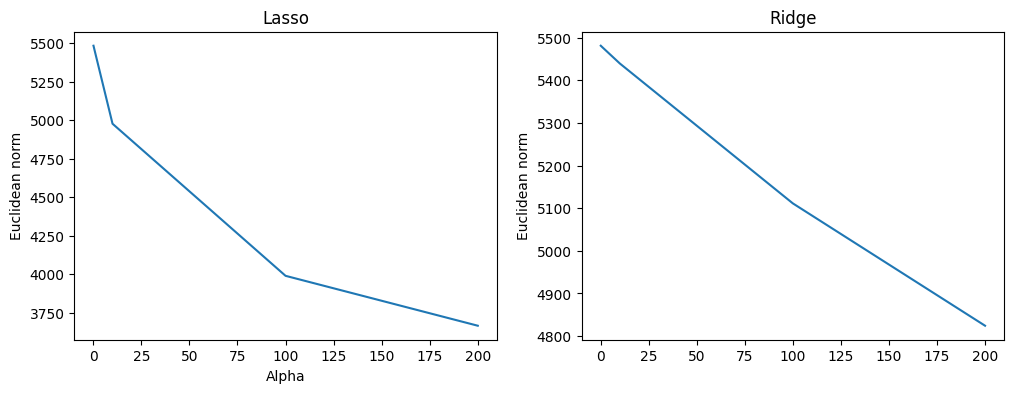

In [530]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(alpha, lasses)
ax1.set_title('Lasso')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Euclidean norm')
ax2.plot(alpha, ridges)
ax2.set_title('Ridge')
ax2.set_ylabel('Alpha')
ax2.set_ylabel('Euclidean norm');

### Обоснование
По графику видно, что Lasso сильнее снижает евклидову норму коэффициентов - это видно по большей "выпуклости" кривой вниз. Lasso благодаря своим математическим особенностям (производная модуля веса в ноль не определена, тогда как квадрата веса равна 2w) позволяет полностью "занулять" бесполезные для объяснительной способности модели признаки, тогда как Ridge их только сильно снижает (то есть они продолжают влиять на модель). Это как бы "тянет" Lasso к нулю, что позволяет отбрасывать ненужные признаки, когда их много. 

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [532]:
from sklearn.linear_model import LassoCV

In [533]:
cv_las = LassoCV(alphas=alpha,cv=5, random_state=2).fit(train_x_train, train_y)
labels = cv_las.alphas_.astype(float)
error_matrix = cv_las.mse_path_.mean(axis=1)
alp = pd.DataFrame(data=error_matrix, columns=['Mean error']).T
alp.columns = labels
alp

,200.00000,100.00000,10.00000,1.00000,0.10000
Mean error,1980846.59902,1557941.34034,1323861.91281,1313468.95681,1313490.85786


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [556]:
lasso = Lasso(1, max_iter=5000).fit(train_x_train, train_y)
print(f"Train: {mean_squared_error(train_y, lasso.predict(train_x_train))}")
las = pd.DataFrame(
    data=lasso.coef_.reshape(1, -1), columns=train_x.columns
).T
las = las.rename(columns={0: "Train"})
las

Train: 1310226.1058598359


,Train
carat,5232.70736
depth,-80.36018
table,-55.49388
x,-1006.84991
y,-0.00000
z,-14.21683
cut_Fair,-130.70721
cut_Good,-49.34471
cut_Ideal,36.07439
cut_Premium,0.00000


### Обоснование
Наибольшим положительным влиянием на цену обладают вес (carat). По всей видимости, именно такой незамысловатый признак увеличивает цену в большей степени. С другой стороны. наибольшим отрицательным влиянием обладает категориальная переменная чистота (clarity), чем мутнее камень, тем ниже цена, а также длина (x). Регуляризация обнулила некоторые показатели цвета (color), которые и так близки к нулю, а также ширину (y) и cut(срез) - по всей видимости, на цену особо не влияют.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [558]:
print(f"Test: {mean_squared_error(test_y, lasso.predict(test_x_test))}")

Test: 1201967.9127904468


### Обоснование
Модель без регуляризации дала MSE равное 1201157.21 на тестовой выборке. Модель с регуляризацией ошибается незначительно чаще - 1201967.91. Это может быть связано с тем, что некоторые из зануленных признаков все-таки имели пусть и небольшое, но все же влияние. Кроме того, возможно, имело место важное взаимодействие признаков, проигнорированное Lasso. Тем не менее, раз показатели среднеквадратичной ошибки примерно одинаковы, лучше все-таки использовать модели с Lasso регуляризацией, так как она позволяет сделать веса куда более корректными для анализа, чем модель без регуляризации.